In [27]:
import time
import os

import numpy as np
import cv2
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

import pyautogui

In [28]:
certificate_password = os.getenv('CERTIFICATE_PASSWROD')
driver_path = os.getenv("DRIVER_PATH")
download_file_path = os.getenv("DOWNLOAD_FILE_PATH")

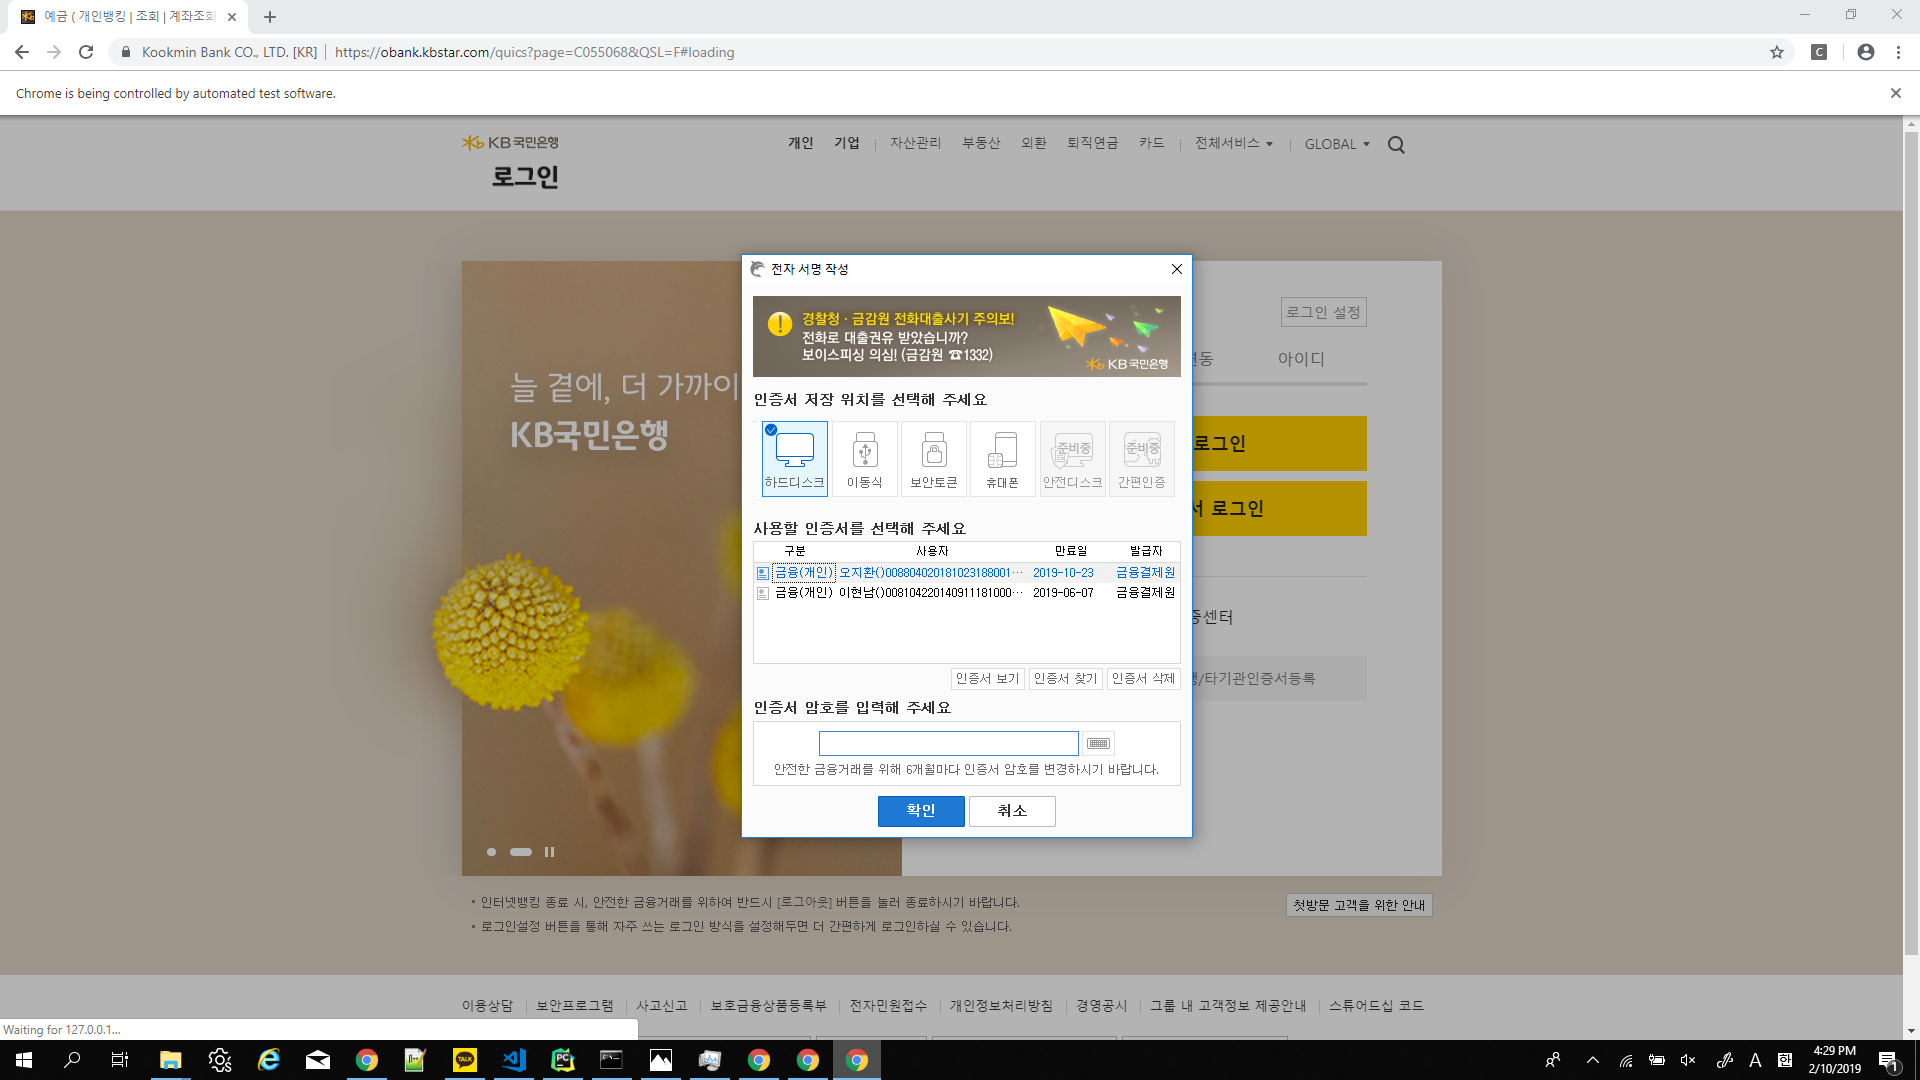

In [75]:
options = Options()
# chrome user agent를 지정해주기
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/60.0.3112.113 Safari/537.36")

#     "download.default_directory" : // String which specifies where to download files to by default.
#     "download.prompt_for_download" : // Boolean which specifies whether we should ask the user if we should download // a file (true) or just download it automatically.
#     "download.directory_upgrade" : // Boolean that records if the download directory was changed by an // upgrade a unsafe location to a safe location.
#     "safebrowsing.enabled" : 

options.add_experimental_option('prefs', {
    "download.default_directory": download_file_path,
    "download.prompt_for_download": False,
    "download.directory_upgrade": True,
    "safebrowsing.enabled": True
})

driver = webdriver.Chrome(driver_path, options=options)
driver.implicitly_wait(5)
driver.get('https://obank.kbstar.com/quics?page=C055068&QSL=F#loading')
cookies = driver.get_cookies()

driver.maximize_window()
button_for_login = driver.find_element_by_xpath("//button[@class='btn'][@title='새창']")
button_for_login.click()

# 공인인증서를 위한 sleep 3초 
time.sleep(4)
pyautogui.screenshot('kb/current.png')

### 엑셀파일다운로드

In [3]:
### 엑셀파일다운로드
inquiry_button = driver.find_element_by_xpath("//a[@href='#none'][text()='조회']")
inquiry_button.click()
inquiry_duration_from = driver.find_element_by_xpath("//input[@id='SJDATE']")
inquiry_duration_to = driver.find_element_by_xpath("//input[@id='JRDATE']")
inquiry_duration_from.send_keys('20181110')
inquiry_duration_to.send_keys('20190210')
excel_button = driver.find_element_by_xpath("//button[@title='엑셀 저장']")
excel_button.click()

NameError: name 'driver' is not defined

### 공인인증서 로그인 (pywinauto)

In [ ]:

process_id = 0
for proc in psutil.process_iter():
    if "delfino" in proc.name():
        process_id = proc.pid
        break
        
delfino = Application(backend='uia').connect(process=process_id)
window = delfino.top_window()

cancel_button = window.child_window(title="취소", control_type="Button")
ok_button = window.child_window(title="확인", control_type="Button")
Pane_object = window.Pane3

key_board = window.GroupBox.Pane
Edit = key_board.Pane2.Edit
Edit.select()
pyautogui.typewrite(certificate_password)
time.sleep(2)
ok_button.click()